# IIR Delay effect
We consider the following mean filter defined by the input-output equation :
* $s[t] = \alpha e[t]+ \beta s[t−D]$

where $s[t]$ is the output and $e[t]$ the input.
## Theoretical analysis 

### Basic analysis 
The system is clearly linear (the output is simple linear combination of the input and the previous values of the output) and time-invariant (the linear combination is same for all t), so the input-output equation indeed corresponds to a filtering.

The system is causal as the output at time t depends of the input and the output the time t and before.
### Impulse response of the filter
The impulse response of the filter for $D=1$, is obtained simply by using the Dirac as the input (e[t]=δ[t]):
* $s[t] = \alpha \delta[t]+ \beta s[t−1]$

$D=1$, that is :
 * $ s[0] = \alpha $, 
 * $s[t] = \beta s[t-1]$,  if  $t \neq$ 0
 
#### Frequency response

##### Transfert function
The transfert function H(z) can be obtained by applying the z-transform on the input-output equation and using the properties of the z-transform (in particular, the time shift properties)  \begin{aligned}S(z) &= \alpha E(z)+ \beta z^{-D}S(z)\end{aligned}  
\begin{aligned}  (1-\beta z^{-D})S(z)= \alpha E(z) \end{aligned}  
Then 

\begin{aligned}H(z) & = \dfrac{\alpha}{(1-\beta z^{-D})} \end{aligned} 

the region of convergence is $∣z∣> \beta^{1/D}$, the filter being causal.
#####  Complex gain
The complex gain is obtained from the transfert function:

\begin{aligned} \hat{h}(\nu) & = H(e^{i 2 \pi \nu}) = \dfrac{\alpha}{(1-\beta e^{-i 2 D \pi \nu})}    \end{aligned}  
Then the FREQUENCE RESPONSE of the filter is :

\begin{aligned} 
|\hat{h}(\nu)|^2 & = |\dfrac{\alpha}{1-\beta e^{-i 2 D \pi \nu}}|^2 \\  &=\dfrac{\alpha^2}{1-2\beta \cos(2 D \pi \nu)+\beta^2} \end{aligned} 


## Delay effect and frequency response implementation

In [214]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile 
from pydub import AudioSegment
from scipy.signal import lfilter, freqz
from scipy.fftpack import fftshift, fft
from IPython.display import display

In [215]:
# Loading the audio file
sound = AudioSegment.from_mp3("string1.mp3")
sound.export("string1.wav", format="wav")
Fs, x = wavfile.read('string1.wav') # load the data

if sound.channels == 2 :
    x = x[:,0]

T = len(x)

In [298]:
D = 10
alpha = 0.2
beta = 0.9
eps = 10**(-8)
# first method
s1 = np.zeros(T)
s1[0:D] = alpha*x[0:D]
for t in range(D,T):
    s1[t] = alpha*x[t] + beta*s1[t-D] 

# second method
h = np.zeros(D+1)
h[0] = 1
h[D] = -beta
s = [alpha]
s2 = lfilter(s,h,x)

# comparization
display(np.linalg.norm(s1-s2))

0.0

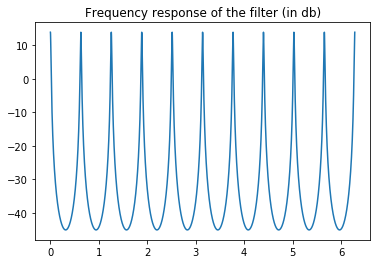

In [299]:
[W,H] = freqz(s,h,round(T/2),Fs)
plt.figure(1)
plt.plot(W,20*np.log(abs(H)+eps))
plt.title('Frequency response of the filter (in db)')
plt.show()

In [300]:
x_fft = fft(x)
x_spectrum_db = 20*np.log(abs(x_fft)+eps)

s_fft = fft(s1)
s_spectrum_db = 20*np.log(abs(s_fft)+eps)

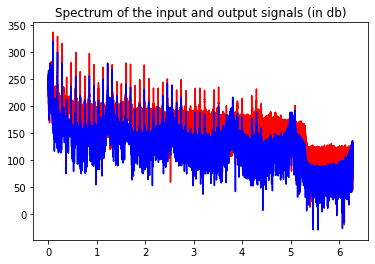

In [301]:
freq_axis = W
plt.figure(3)
plt.plot(freq_axis,x_spectrum_db[:round(T/2)],'r',freq_axis,s_spectrum_db[:round(T/2)],'b')
plt.title('Spectrum of the input and output signals (in db)')
plt.show()

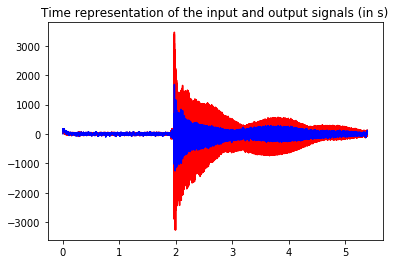

In [302]:
time_axis = np.linspace(0,T/Fs,T)
plt.figure(3)
plt.plot(time_axis,x,'r',time_axis,s1,'b')
plt.title('Time representation of the input and output signals (in s)')
plt.show()

In [303]:
import scipy.io.wavfile

scipy.io.wavfile.write('string1_IIR_delay.wav',Fs,s1)

### Is this implementation always stable ?
No, the implementation is not always stable. When we set the variable $\beta$ to a value superior to 1, $|\beta| >= 1$, the output diverge. 
For example, when we chose $\beta =1$, we obtain the figure below.
<img src="time_representation.png">

### Discuss the parameters :
* To obtain a stable filter, we must set $|\beta|<1$.
* when we increase the value of $\alpha$ the resulting amplitude of the signal is bigger, otherwise is smaller.

### Compare with the FIR implementation :

*  IIR can be unstable, whereas FIR is always stable.
*  IIR is derived from analog, whereas FIR has no analog history.
*  The response impulse of IIR filter is infinite whereas for FIR filter is finite.

